In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
#produces plots inline with notebook

In [27]:
path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
df= pd.read_csv(path)
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [28]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]#Only take some data
cdf

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


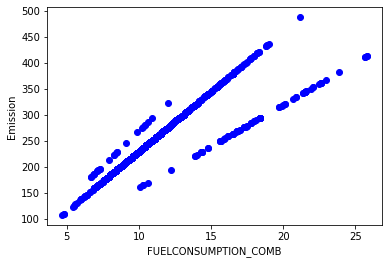

In [29]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

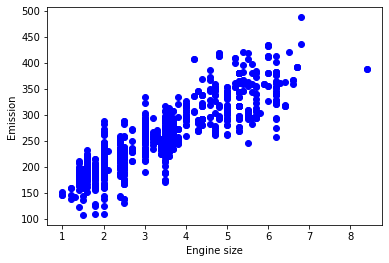

In [30]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

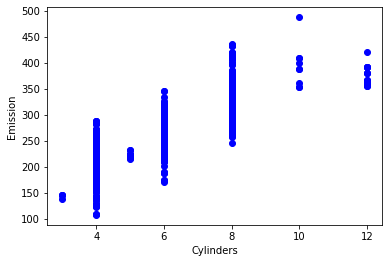

In [31]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

In [32]:
from sklearn.model_selection import train_test_split#For splitting it into train and test datas
X= cdf["ENGINESIZE"]
y = cdf["CO2EMISSIONS"]
# 20% of data for testing, rest for training model
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [33]:
y_train

277     242
768     276
57      262
8       267
525     196
       ... 
691     352
60      281
925     393
1036    216
510     237
Name: CO2EMISSIONS, Length: 853, dtype: int64

In [34]:
y_shaped = np.array(y_train).reshape(-1,1)
y_shaped

array([[242],
       [276],
       [262],
       [267],
       [196],
       [260],
       [198],
       [237],
       [161],
       [207],
       [166],
       [230],
       [331],
       [156],
       [413],
       [294],
       [191],
       [290],
       [336],
       [159],
       [253],
       [177],
       [221],
       [184],
       [196],
       [191],
       [223],
       [317],
       [175],
       [189],
       [288],
       [221],
       [251],
       [218],
       [373],
       [276],
       [246],
       [209],
       [214],
       [170],
       [209],
       [334],
       [267],
       [196],
       [288],
       [224],
       [380],
       [292],
       [216],
       [317],
       [165],
       [230],
       [389],
       [285],
       [191],
       [184],
       [292],
       [191],
       [221],
       [179],
       [281],
       [184],
       [235],
       [253],
       [258],
       [267],
       [344],
       [317],
       [196],
       [212],
       [193],
      

In [35]:
#Modelling using Linear Regression bw Engine size and CO2 emissions
from sklearn import linear_model
regr = linear_model.LinearRegression()

#np.array used as it takes in np only
#reshape used as training set is dataframe and has labels and they have to be removed, puts data in a column
#reshape(-1) is a line vector, and reshape(-1,1) is a column
regr.fit(np.array(X_train).reshape(-1,1),np.array(y_train).reshape(-1,1))#train this model using training inputs(80% of inputs)

# The coefficients of y=mx+c in linear regression
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.47407164]]
Intercept:  [124.19224741]


Text(0, 0.5, 'Emission')

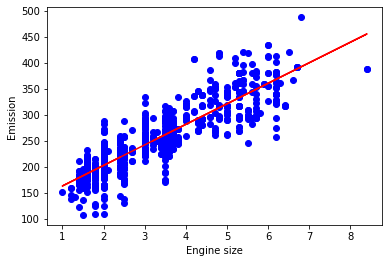

In [36]:
#Plot model line over our data
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [37]:
#Calculate model accuracy
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )#Should be high

Mean absolute error: 23.39
Residual sum of squares (MSE): 924.16
R2-score: 0.79
